In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [3]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

C:\Users\WELCOME\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [4]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
book_filename = 'C:\\Users\\WELCOME\\Desktop\\gameofthrones\\got1.txt'
book_filename

'C:\\Users\\WELCOME\\Desktop\\gameofthrones\\got1.txt'

In [6]:
corpus_raw = u""
print("Reading '{0}'...".format(book_filename))
with codecs.open(book_filename, "r", "utf-8",errors='ignore') as book_file:
    corpus_raw += book_file.read()
print("Corpus is now {0} characters long".format(len(corpus_raw)))
print()

Reading 'C:\Users\WELCOME\Desktop\gameofthrones\got1.txt'...
Corpus is now 1762935 characters long



In [7]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
raw_sentences = tokenizer.tokenize(corpus_raw)

In [8]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [9]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

print(raw_sentences[8])
print(sentence_to_wordlist(raw_sentences[8]))

Visit our website at www.bantamdell.com

Bantam Books, the rooster colophon, Spectra and the portrayal of a boxed s are registered trademarks of Random House Inc.

eISBN: 978-0-553-89785-2

v3.0_r1





CONTENTS


COVER

TITLE PAGE

COPYRIGHT

DEDICATION

MAPS

PROLOGUE



ARYA

SANSA

TYRION

BRAN

ARYA

JON

CATELYN

TYRION

ARYA

DAVOS

THEON

DAENERYS

JON

ARYA

TYRION

BRAN

TYRION

SANSA

ARYA

TYRION

BRAN

CATELYN

JON

THEON

TYRION

ARYA

DAENERYS

BRAN

TYRION

ARYA

CATELYN

SANSA

CATELYN

JON

BRAN

TYRION

THEON

ARYA

CATELYN

DAENERYS

TYRION

DAVOS

JON

TYRION

CATELYN

BRAN

ARYA

DAENERYS

TYRION

THEON

JON

SANSA

JON

TYRION

CATELYN

THEON

SANSA

DAVOS

TYRION

SANSA

TYRION

SANSA

DAENERYS

ARYA

SANSA

THEON

TYRION

JON

BRAN

APPENDIX

THE KINGS AND THEIR COURTS

THE KING ON THE IRON THRONE

THE KING IN THE NARROW SEA

THE KING IN HIGHGARDEN

THE KING IN THE NORTH

THE QUEEN ACROSS THE WATER

OTHER HOUSES GREAT AND SMALL

HOUSE ARRYN

HOUSE FLORENT

HOUS

In [10]:

token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 325,257 tokens


In [11]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [12]:

thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)



In [13]:
thrones2vec.build_vocab(sentences)

In [14]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))

Word2Vec vocabulary length: 7415


In [15]:
thrones2vec.train(sentences,total_examples=thrones2vec.corpus_count, epochs=thrones2vec.iter)

1220311

In [16]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [17]:
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

In [18]:


thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))



In [19]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [20]:
all_word_vectors_matrix = thrones2vec.wv.syn0

In [21]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [22]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [23]:
points.head(10)

,word,x,y
0,This,1.418845,9.259090
1,edition,8.695279,-2.698371
2,the,-3.123420,-3.291482
3,complete,10.125013,0.661784
4,of,-4.664572,4.719576
5,A,-0.378653,3.641567
6,OF,-2.619772,-10.658262
7,KINGS,-4.743295,-9.392958
8,Bantam,-4.741804,-9.379065
9,Spectra,-4.778311,-9.370619


In [24]:
sns.set_context("poster")

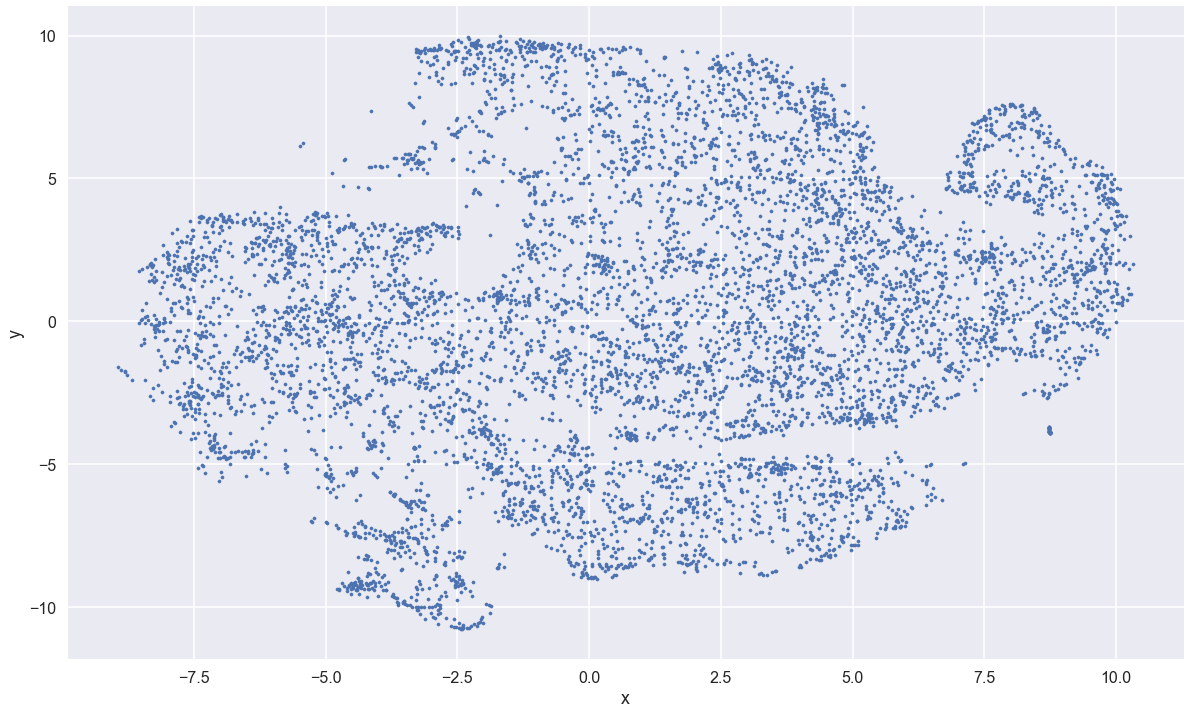

In [26]:
new_plot=points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [27]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

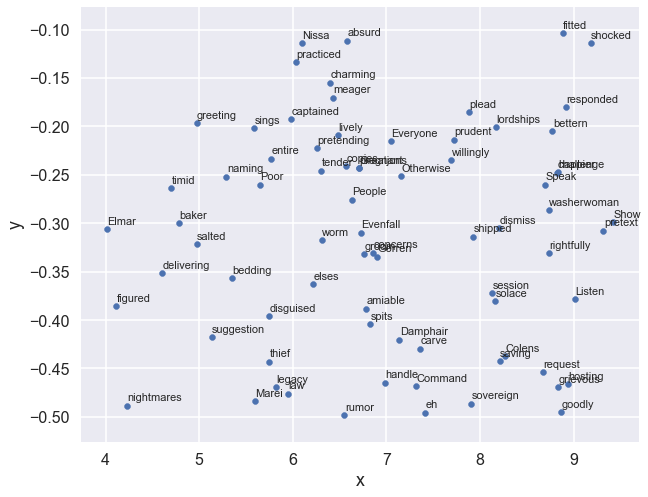

In [73]:
plot_region(x_bounds=(4.0, 10), y_bounds=(-0.5, -0.1))


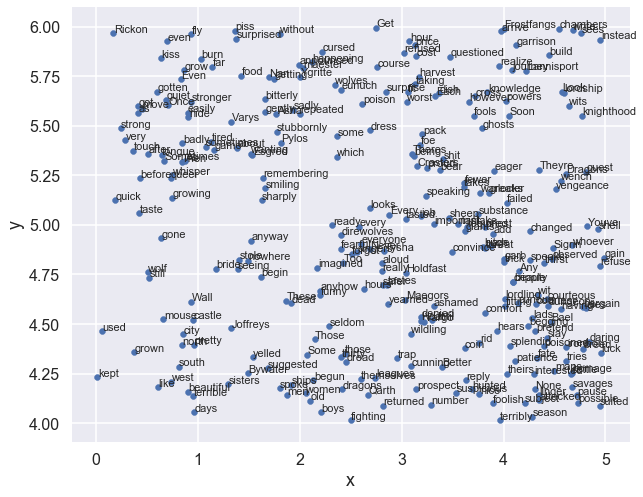

In [28]:
plot_region(x_bounds=(0, 5), y_bounds=(4, 6))

In [32]:
thrones2vec.most_similar("egg")

[('stare', 0.9917538166046143),
 ('bitten', 0.9908890724182129),
 ('pillow', 0.9901749491691589),
 ('paused', 0.9897494912147522),
 ('donkey', 0.9888133406639099),
 ('unlaced', 0.9875539541244507),
 ('yank', 0.9872298240661621),
 ('shiver', 0.9862529635429382),
 ('skull', 0.9862044453620911),
 ('stump', 0.9861272573471069)]